## Dependency

In [2]:
import sys
sys.path.append('..')
import os
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
from PIL import Image
from pathlib import Path
from src.visualization.plotgraph import show_plot_class_distribution_pie, show_plot_class_distribution, get_all_image_sizes, show_plot_image_sizes, show_scatter_for_image_sizes

## Paths

In [3]:
root_path = os.path.abspath(os.path.join('..')) 
data_path = os.path.join(root_path, "data", "raw")

## Constants

In [4]:
CLASS_COLUMN = "Class"
IMAGE_COUNT_COLUMN = "Image Count"

## Load Data

In [5]:
class_labels = os.listdir(data_path)

In [6]:
print(class_labels)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [7]:
class_labels_count = len(class_labels)

print(F"Class labels count: {class_labels_count}")

Class labels count: 10


In [8]:
class_totals = []

for label in class_labels:
    label_path = os.path.join(data_path, label)
    label_count = len(os.listdir(label_path))
    class_totals.append(label_count)


In [9]:
print(class_totals)

[2112, 1668, 3098, 1866, 4863, 1446, 2623, 1820, 4821, 1862]


In [10]:
print(sum(class_totals))

26179


In [11]:
all_images = []
for class_dir in Path(data_path).iterdir():
    all_images.extend(list(class_dir.glob('*.*'))) 

In [12]:
random_images = random.sample(all_images, 16)

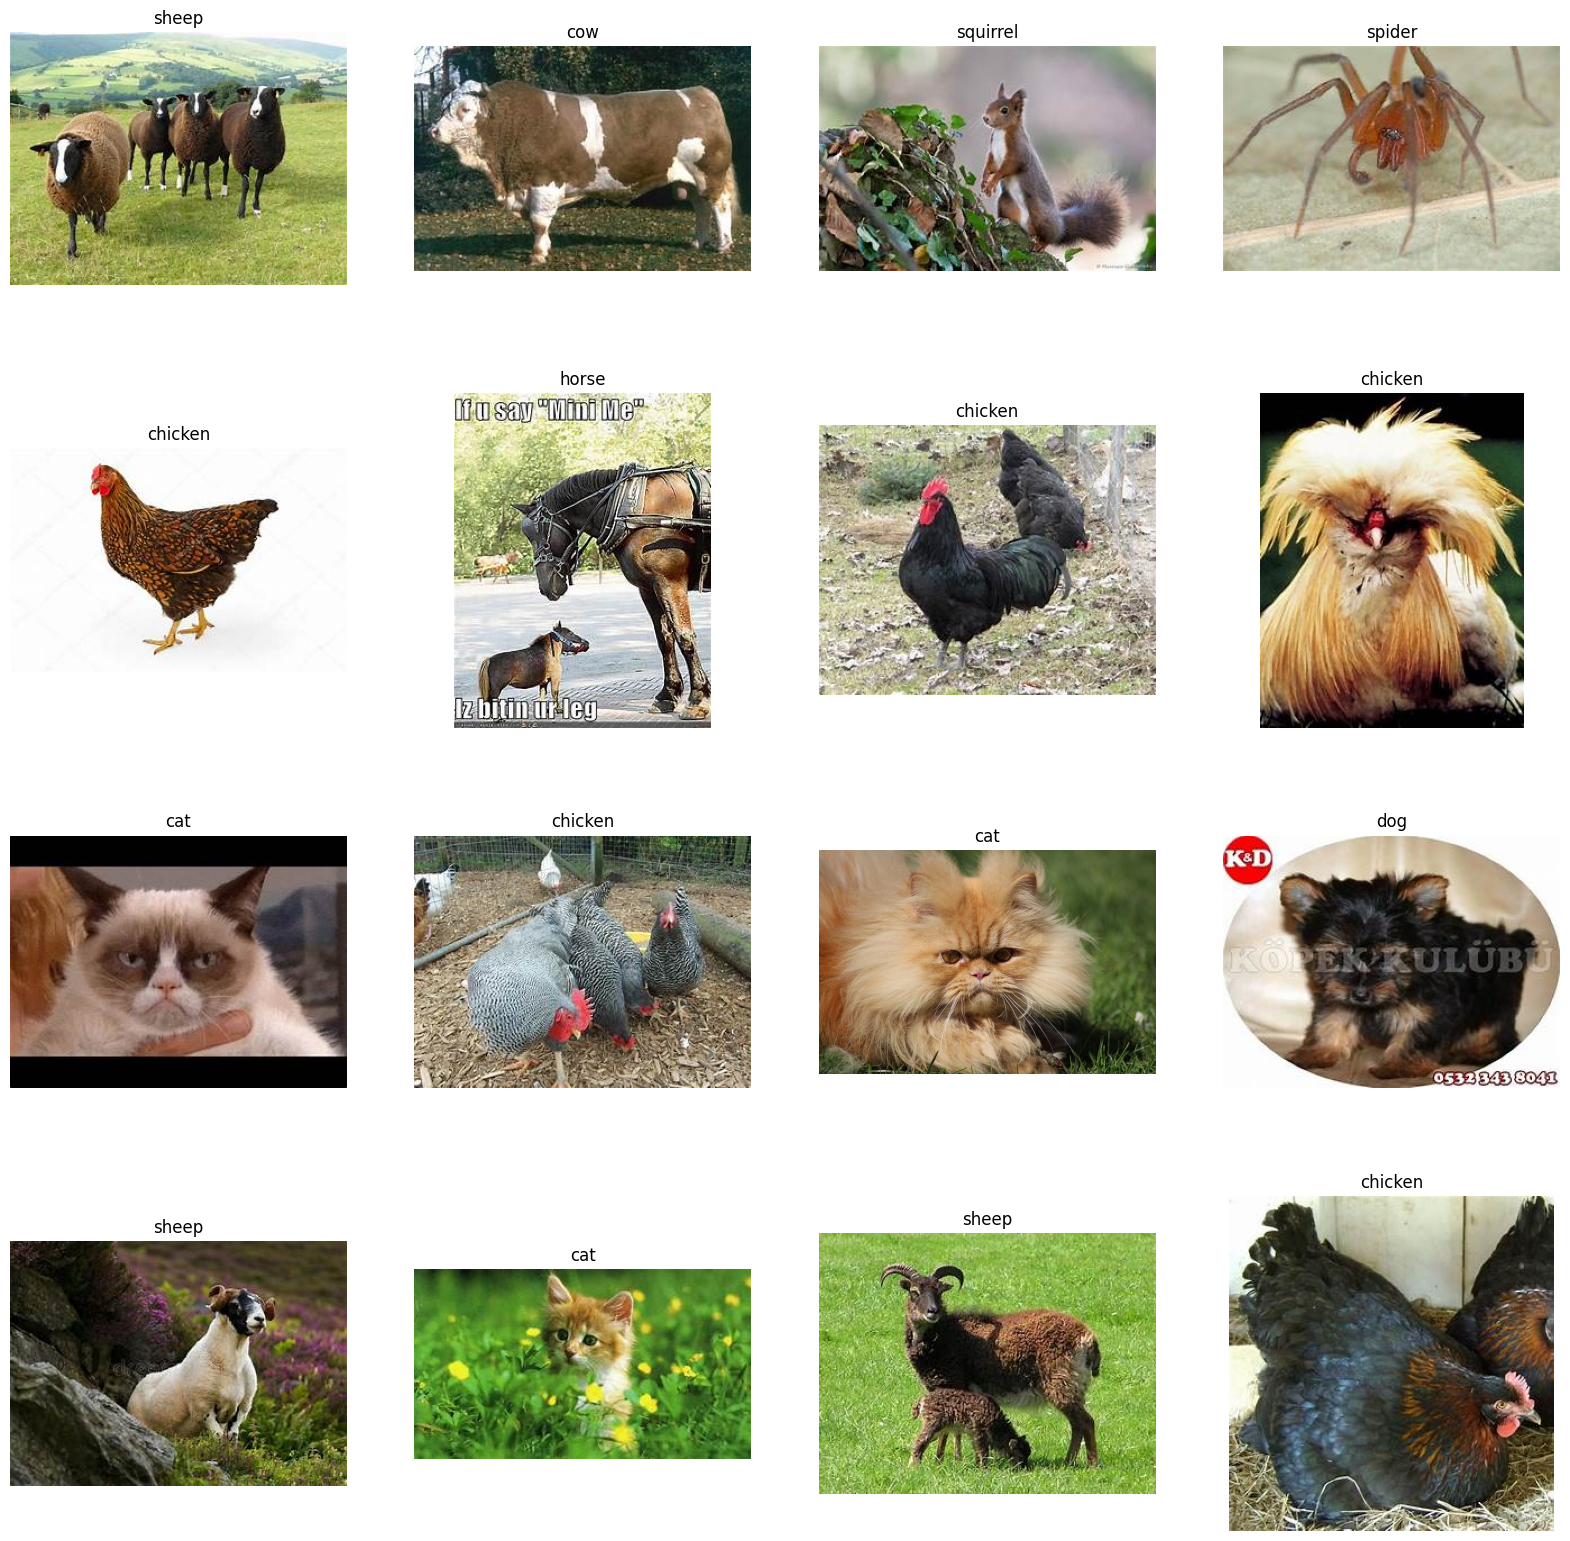

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
ax = ax.flatten()
for idx, image_path in enumerate(random_images):
    img = Image.open(image_path)
    class_name = image_path.parent.name 
    ax[idx].imshow(np.array(img))
    ax[idx].set_title(class_name)
    ax[idx].axis('off')  # Turn off axis

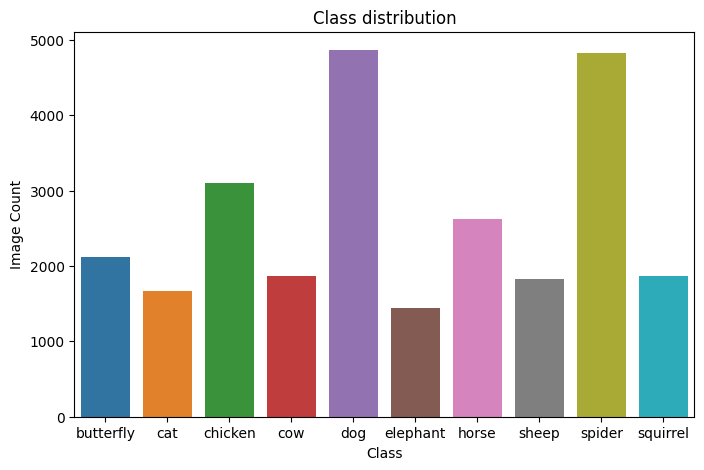

In [14]:
class_distribution_df = pd.DataFrame({
    CLASS_COLUMN: class_labels,
    IMAGE_COUNT_COLUMN: class_totals
})


show_plot_class_distribution(class_distribution_df, CLASS_COLUMN, IMAGE_COUNT_COLUMN, "Class distribution", figure_size=(8, 5))

In [15]:
show_plot_class_distribution_pie(class_distribution_df, CLASS_COLUMN, IMAGE_COUNT_COLUMN, title="Data Distribution of animal dataset")

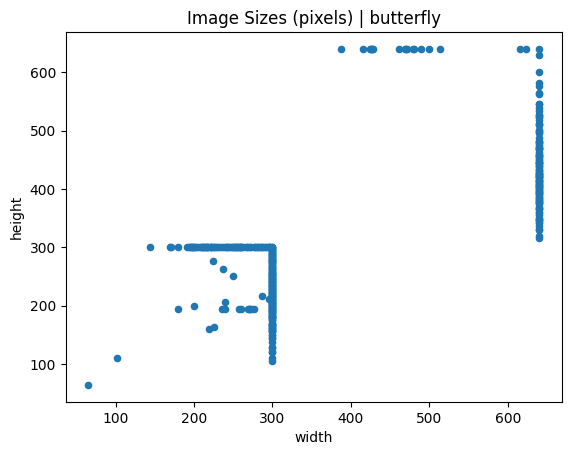

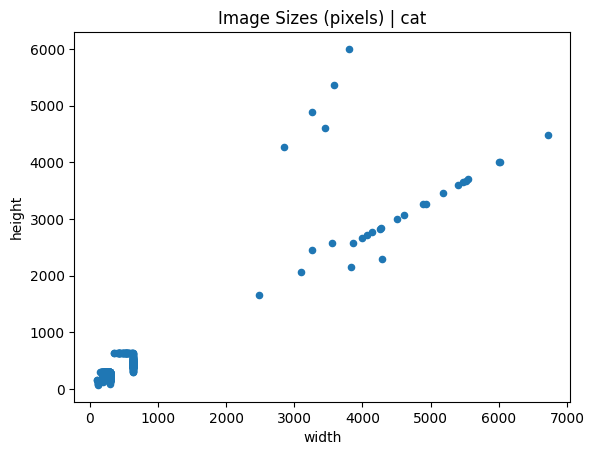

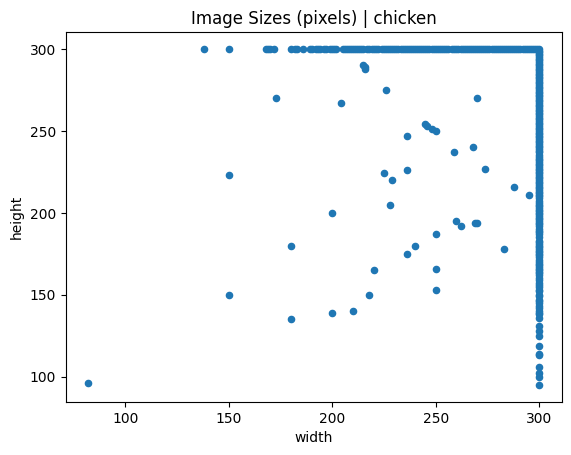

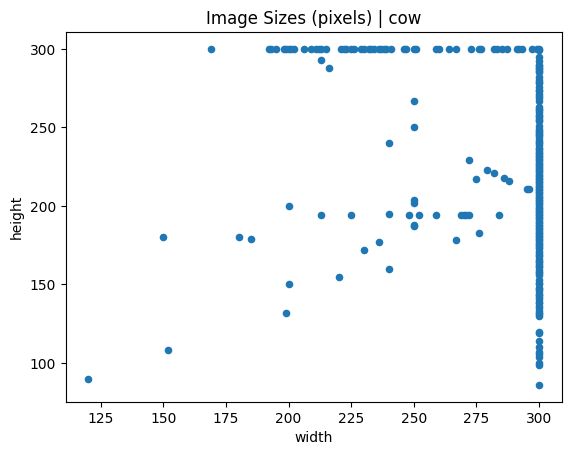

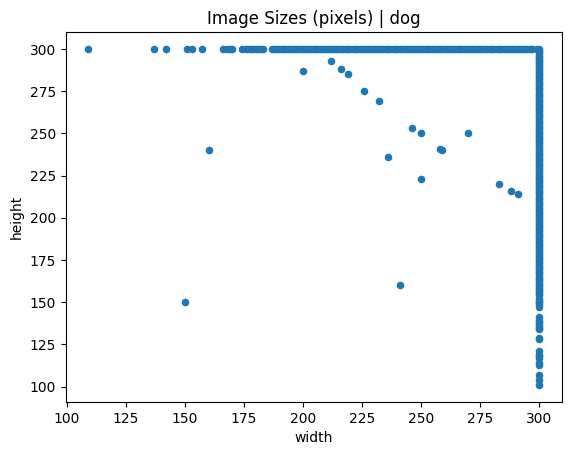

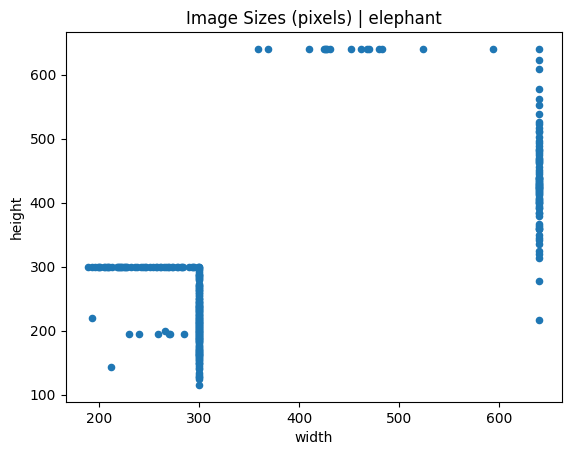

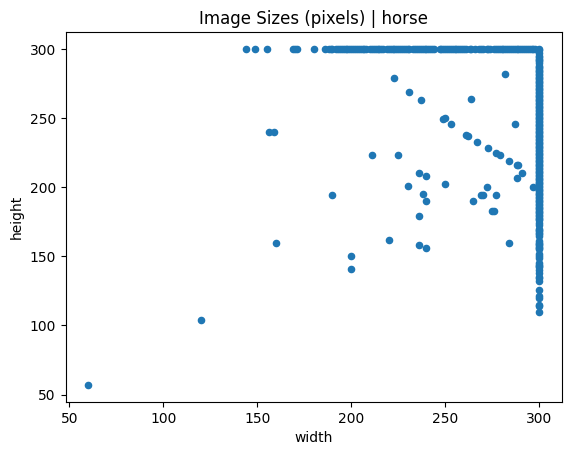

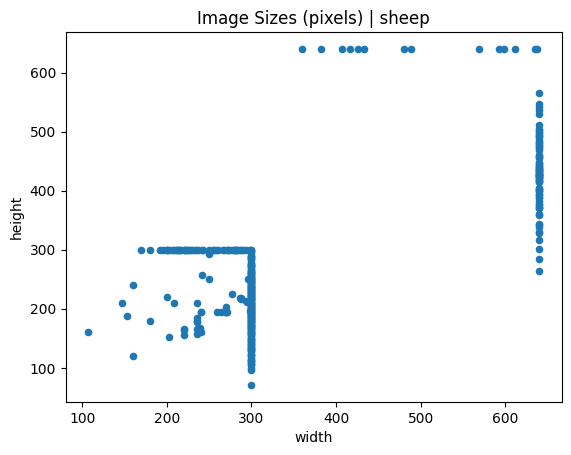

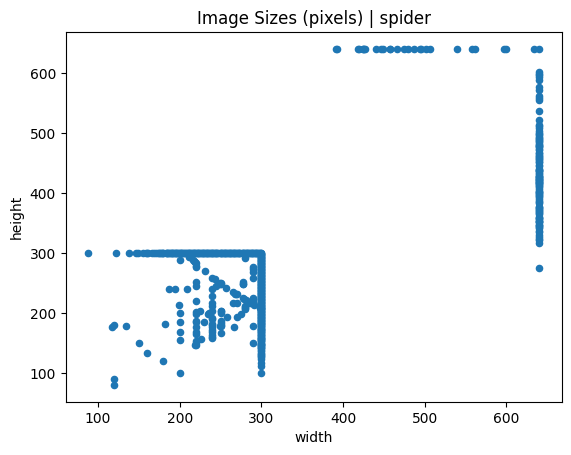

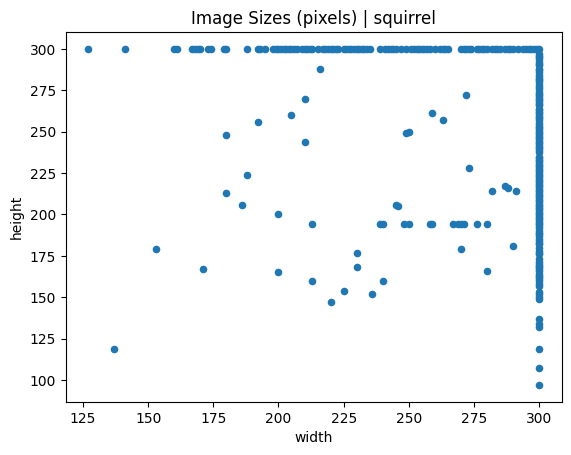

In [16]:
for label in class_labels:
    label_path = os.path.join(data_path, label)

    show_plot_image_sizes(data_path, label)

In [17]:
all_sizes_df = get_all_image_sizes(data_path, class_labels)

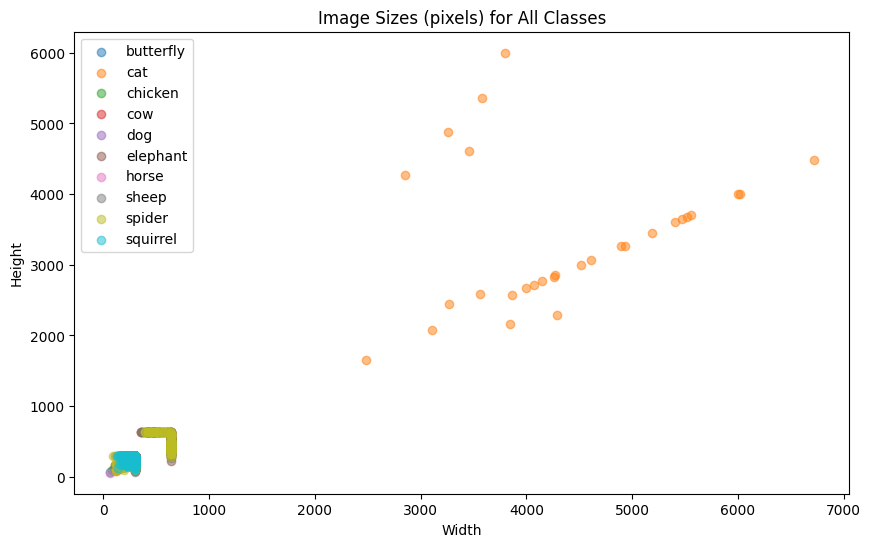

In [18]:
show_scatter_for_image_sizes(all_sizes_df, class_labels, title='Image Sizes (pixels) for All Classes')

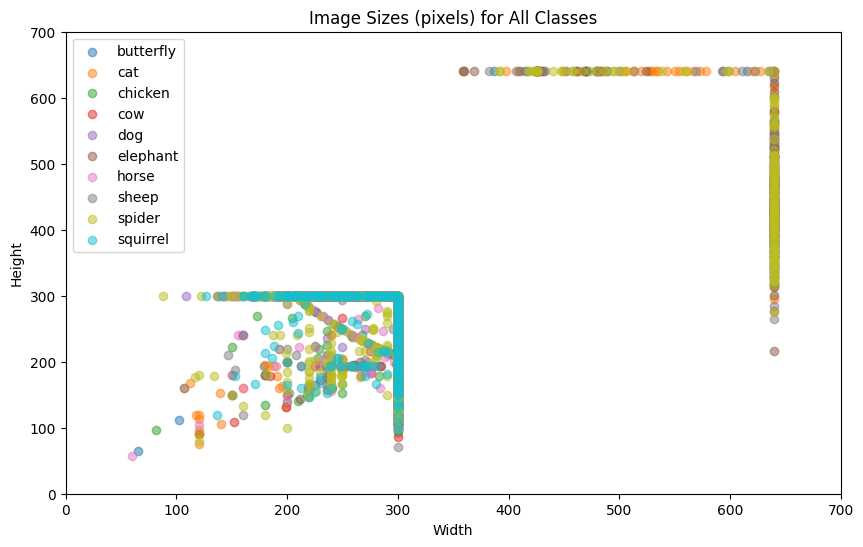

In [19]:
show_scatter_for_image_sizes(all_sizes_df, class_labels, (0, 700), (0, 700), title='Image Sizes (pixels) for All Classes')

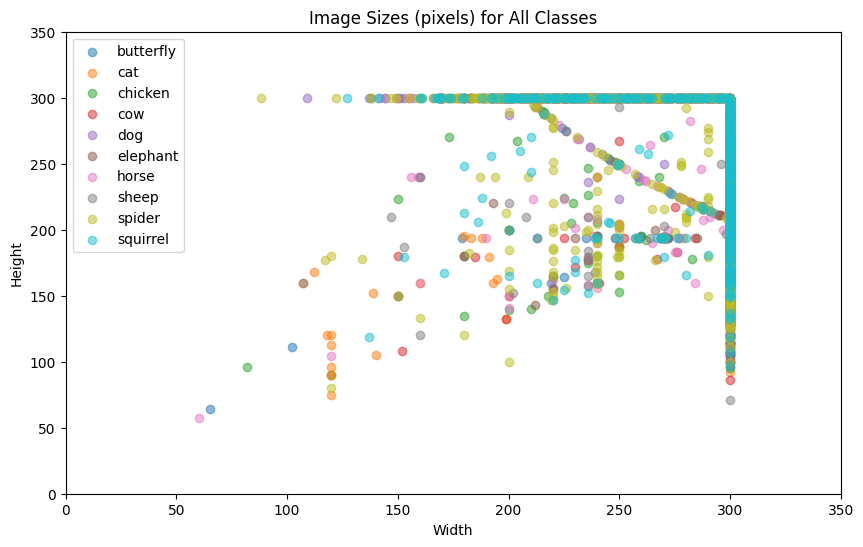

In [20]:
show_scatter_for_image_sizes(all_sizes_df, class_labels, (0, 350), (0, 350), title='Image Sizes (pixels) for All Classes')

## Conclusion

The dataset is significantly unbalanced with images of different sizes